In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\yadav\Downloads\data.csv\data.csv", encoding='unicode_escape')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


EDA

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.shape


(541909, 8)

In [5]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(subset=['CustomerID'],axis = 0, inplace=True)


In [7]:
df.isnull().sum()



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Month-Year'] = df['Date'].dt.strftime('%b-%Y')
df.drop(['InvoiceDate','Date'],axis=1,inplace=True)


In [10]:
df.reset_index(drop=True, inplace=True)
df


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


In [11]:
df['Description'].value_counts()


WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [12]:
columns=["Description", "Quantity", "UnitPrice" ]
df_max = df[df['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"][columns]
df_max


,Description,Quantity,UnitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
49,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
66,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
220,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55
262,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55
...,...,...,...
403929,WHITE HANGING HEART T-LIGHT HOLDER,1,2.95
403964,WHITE HANGING HEART T-LIGHT HOLDER,2,2.95
404428,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95
405907,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55


In [13]:
#check quantity of all different items
df_quan = df.groupby('Description')['Quantity'].sum().reset_index()
df_quan.columns = ['Description', 'Total Quantity']
df_quan


,Description,Total Quantity
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1883
2,DOLLY GIRL BEAKER,2391
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,4850
3892,ZINC TOP 2 DOOR WOODEN SHELF,5
3893,ZINC WILLIE WINKIE CANDLE STICK,2595
3894,ZINC WIRE KITCHEN ORGANISER,25


In [14]:
df_quan_top15 = df_quan.nlargest(15, 'Total Quantity')
df_quan_top15


,Description,Total Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


visualization

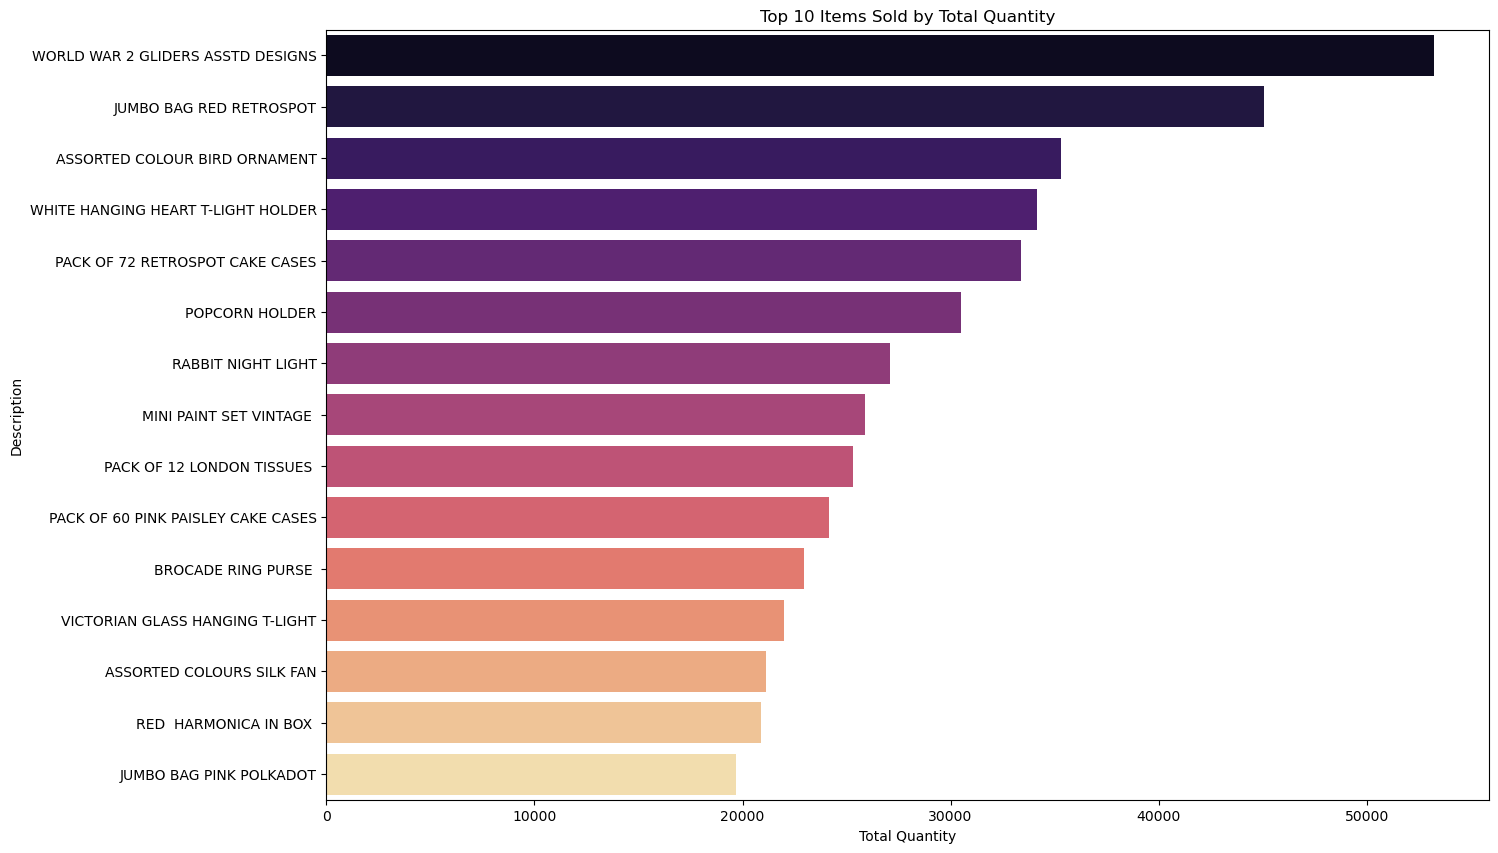

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_quan_top15, x="Total Quantity", y="Description", capsize=3, palette="magma")
plt.title("Top 10 Items Sold by Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Description")
plt.show()


In [16]:
df['Total Price'] = df['UnitPrice'] * df['Quantity']
df.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34


<AxesSubplot:>

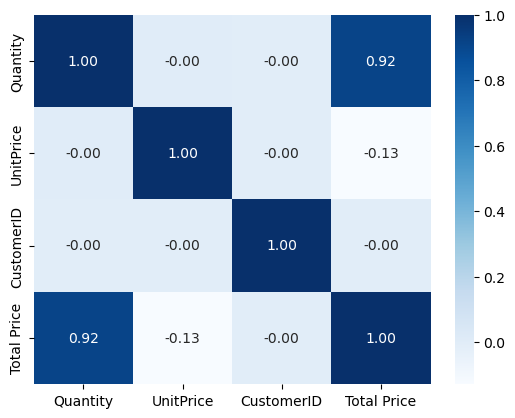

In [17]:
#HeatMap Analysis

sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f")


In [18]:
#Performing Encoding on the non-numerical columns, which may be necessary for the price recommendation.
label_en = LabelEncoder()
df['StockCode_Encode'] = label_en.fit_transform(df['StockCode'])
df['Invoice_Encode'] = label_en.fit_transform(df['InvoiceNo'])
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price,StockCode_Encode,Invoice_Encode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30,3249,0
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2649,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00,2855,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2803,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2802,0
...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011,10.20,1470,18535
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011,12.60,1746,18535
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011,16.60,2086,18535
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011,16.60,2087,18535


preparing for  dataset for Regression Analysis



In [19]:
X = df.drop(columns=['InvoiceNo','StockCode','Total Price','Month-Year','Description','CustomerID','Country'])
y = df['Total Price']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[-0.03636296, -0.00707983, -0.45122233,  0.92579004],
       [-0.03996953, -0.00707983, -0.68693822,  0.62134974],
       [-0.03996953, -0.04072785, -0.21550644,  0.62098967],
       ...,
       [-0.03636296, -0.03766894,  0.22749729, -0.62431701],
       [-0.03636296, -0.01865049, -0.81012642, -0.4793883 ],
       [-0.03636296, -0.0183845 , -0.82670945, -0.72189634]])

In [21]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    Lasso(alpha = 10),
    Ridge(alpha = 10)
]
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    r2_value = r2_score(y_test,y_pred)
    print(f"{m.__class__.__name__} R2 Score: {r2_value}")


LinearRegression R2 Score: -0.07562386632372653
RandomForestRegressor R2 Score: 0.6060079308437931
Lasso R2 Score: 0.013488869789708424
Ridge R2 Score: -0.07559547874477812


In [22]:
#Analysis for Lasso Model, which is second best in this scenario

r2_lasso = []
for x in range(10,500,10):
    model_l = Lasso(alpha = x)
    model_l.fit(X_train, y_train)
    y_pred = model_l.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    r2_lasso.append(r2_value)
r2_lasso


[0.013488869789708424,
 0.09550456722507383,
 0.1689690429199534,
 0.23388229693001328,
 0.29024432922148635,
 0.3380551397943735,
 0.3640198452849658,
 0.36665930251864276,
 0.36859644778417533,
 0.3698312810815635,
 0.37036380241080724,
 0.3701940117719068,
 0.36932190916486207,
 0.36774749458967304,
 0.3654707680463395,
 0.36249172953486186,
 0.35881037905523994,
 0.3544267166074735,
 0.34934074219156286,
 0.3435524558075078,
 0.3370618574553085,
 0.32986894713496495,
 0.3219737248464769,
 0.3133761905898448,
 0.30407634436506825,
 0.2940741861721472,
 0.2833697160110822,
 0.27196293388187265,
 0.2598538397845188,
 0.24704243371902068,
 0.23352871568537836,
 0.21931268568359152,
 0.2043943437136605,
 0.18877368977558506,
 0.17245072386936533,
 0.15542544599500152,
 0.13769785615249308,
 0.11926795434184045,
 0.10013574056304342,
 0.0803012148161022,
 0.05976437710101645,
 0.038525227417786634,
 0.016583765766412295,
 -4.082751379641536e-06,
 -4.082751379641536e-06,
 -4.0827513796415

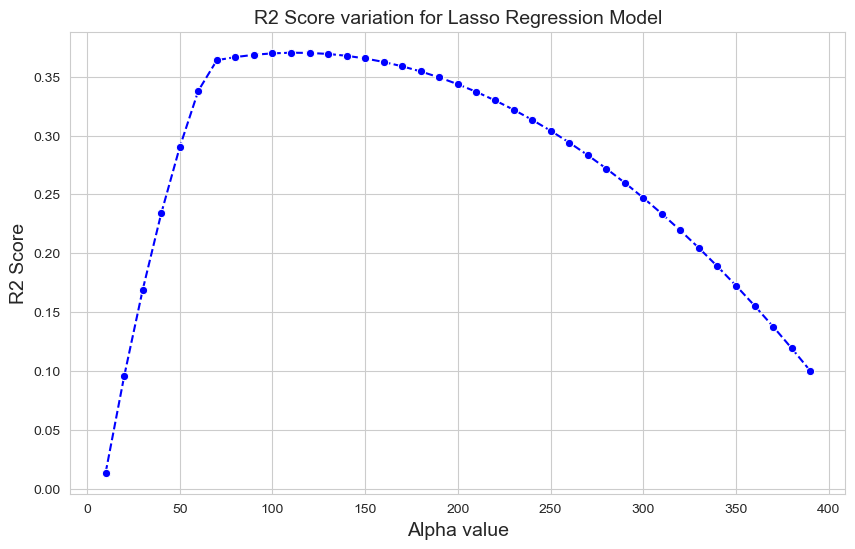

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(10,400,10)), y=r2_lasso[:39], marker='o', color='blue', linestyle = 'dashed')
plt.title('R2 Score variation for Lasso Regression Model',fontsize=14)
plt.xlabel('Alpha value',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()


In [34]:
n_estim = list(range(20,160,10))
random_forest_R = []


In [35]:
for n in n_estim:
    rf_R = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_R.fit(X_train,y_train)
    y_pred_ = rf_R.predict(X_test)




In [36]:
    r2_value = r2_score(y_test,y_pred_)
    random_forest_R.append(r2_value)


In [39]:
max(random_forest_R)

0.6001188913457269